This notebook creates and then trains naive templates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle, copy
from scipy.interpolate import interp1d

from modules import get_bandpass_dict, get_eff_wavelen, Sed, \
                    create_training_sets, train_templates

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

Load the filters

In [3]:
bandpass_dict = get_bandpass_dict()

Load the galaxy redshift catalog

In [4]:
with open('data/training_catalog.pkl', 'rb') as input:
    galaxies = pickle.load(input)

Create the naive templates

In [5]:
def log_norm(x,mode,sigma):
    mu = np.log(mode) + sigma**2
    f1 = lambda x: 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return f1(x)/f1(5000)

N = 8
n = 3
modes  = np.concatenate((np.linspace(5500,4600,n,endpoint=False),np.linspace(4600,1000,N-n)))
sigmas = np.concatenate((np.linspace(0.35,0.56,n,endpoint=False),np.linspace(0.56, 0.9,N-n)))

# save the templates as Seds
x = np.arange(10,15000,100,dtype=float)
naive_templates = dict()
for i in range(N):
    template = Sed()
    template.wavelen = x
    template.flambda = log_norm(x,modes[i],sigmas[i])
    naive_templates["N8_"+str(i+1)] = template

Now train the templates

In [6]:
%%time
trained_templates, final_sets, history = train_templates(naive_templates, galaxies, bandpass_dict, w=0.1, dmsfe_stop=0.05, verbose=True)

Round 1
N8_1:   64.7   31.3   29.1   28.7  
N8_2:   97.2   58.0   56.1  
N8_3:   85.8   59.8   58.0  
N8_4:   88.2   60.7   58.2  
N8_5:   98.6   59.5   57.2  
N8_6:  260.0  155.3  149.2  
N8_7:  527.1  295.7  287.9  
N8_8: 1519.1  888.6  883.9  
Round 2
N8_1:   29.2  
N8_2:   44.7   38.6   38.4  
N8_3:   41.5   37.4   37.3  
N8_4:   41.0   38.5   38.2  
N8_5:   32.4   30.2   30.0  
N8_6:   72.9   65.3   65.0  
N8_7:  321.4  304.8  303.9  
N8_8:  581.7  499.2  495.9  
Round 3
N8_1:   30.3  
N8_2:   44.5   40.3   40.2  
N8_3:   40.1   37.0   37.0  
N8_4:   34.8   33.5  
N8_5:   30.5  
N8_6:   65.7  
N8_7:  256.8  251.0  
N8_8:  546.7  518.6  517.3  
Round 4
N8_1:   29.6  
N8_2:   45.8   42.5   42.4  
N8_3:   44.2   41.1   41.0  
N8_4:   32.8  
N8_5:   30.4  
N8_6:   47.9   45.9  
N8_7:  134.3  131.3  
N8_8:  894.6  874.3  
Round 5
N8_1:   28.8  
N8_2:   46.9   43.3   43.2  
N8_3:   46.8   44.1   44.0  
N8_4:   31.6  
N8_5:   30.1  
N8_6:   51.5   50.1  
N8_7:  124.0  122.0  
N8_8:  921.

Number of fluxes in each training set:
[41485, 36834, 44270, 57709, 79859, 76771, 53064, 21736]


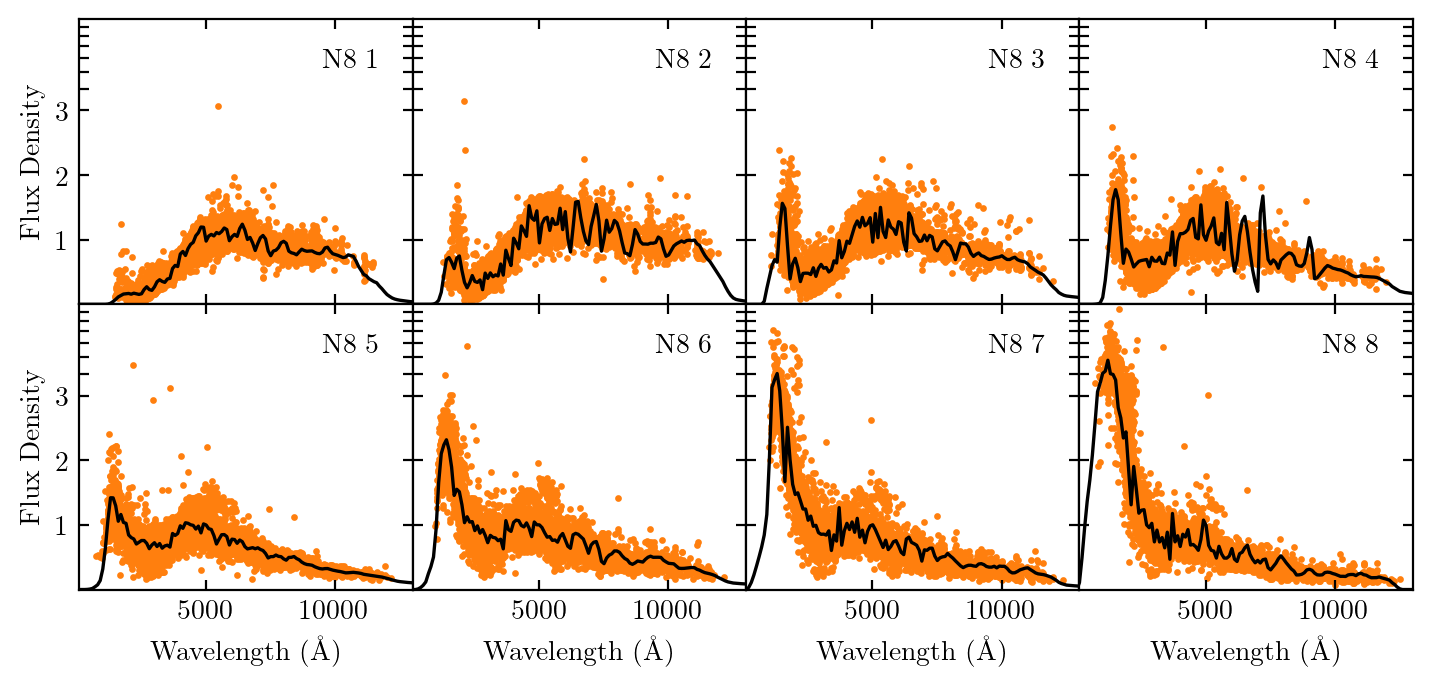

In [7]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

Number of fluxes in each training set:
[33818, 36556, 42212, 53879, 78234, 91544, 57775, 17710]


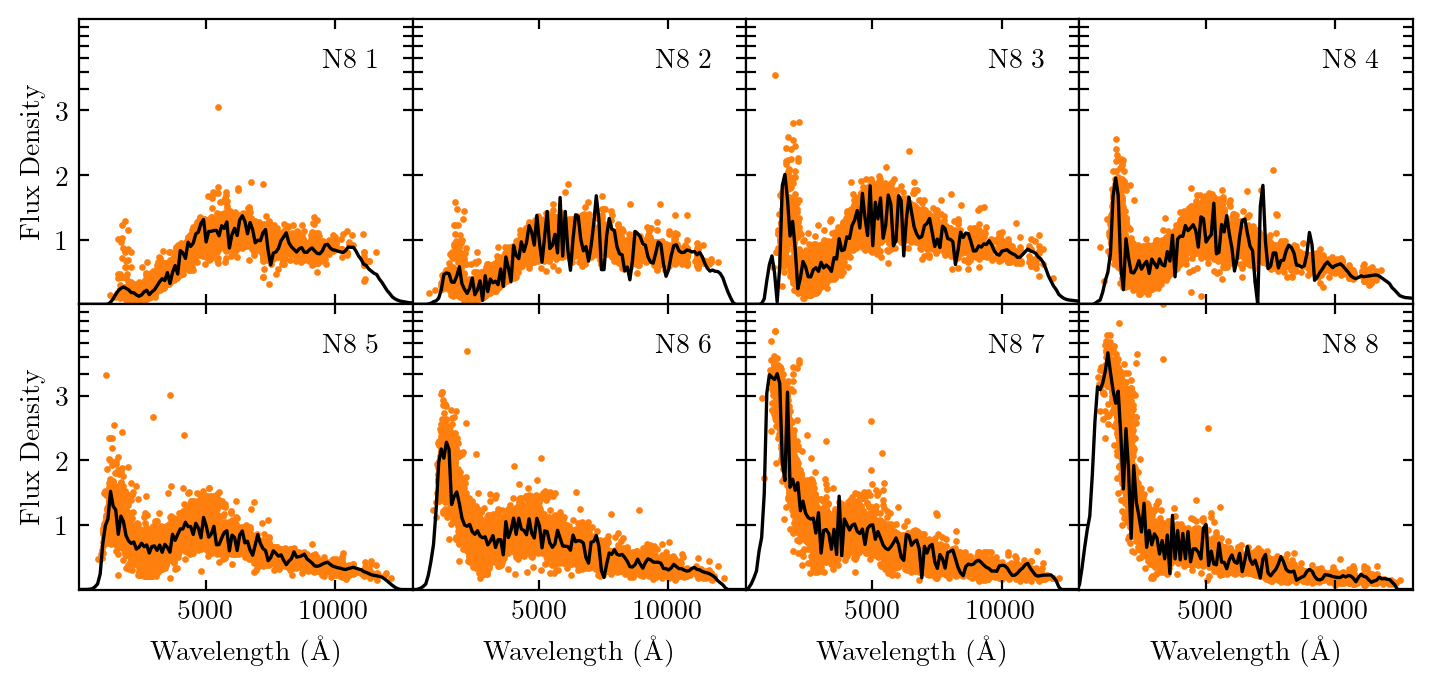

In [7]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

Number of fluxes in each training set:
[44676, 41394, 42124, 53652, 60240, 80771, 62896, 25975]


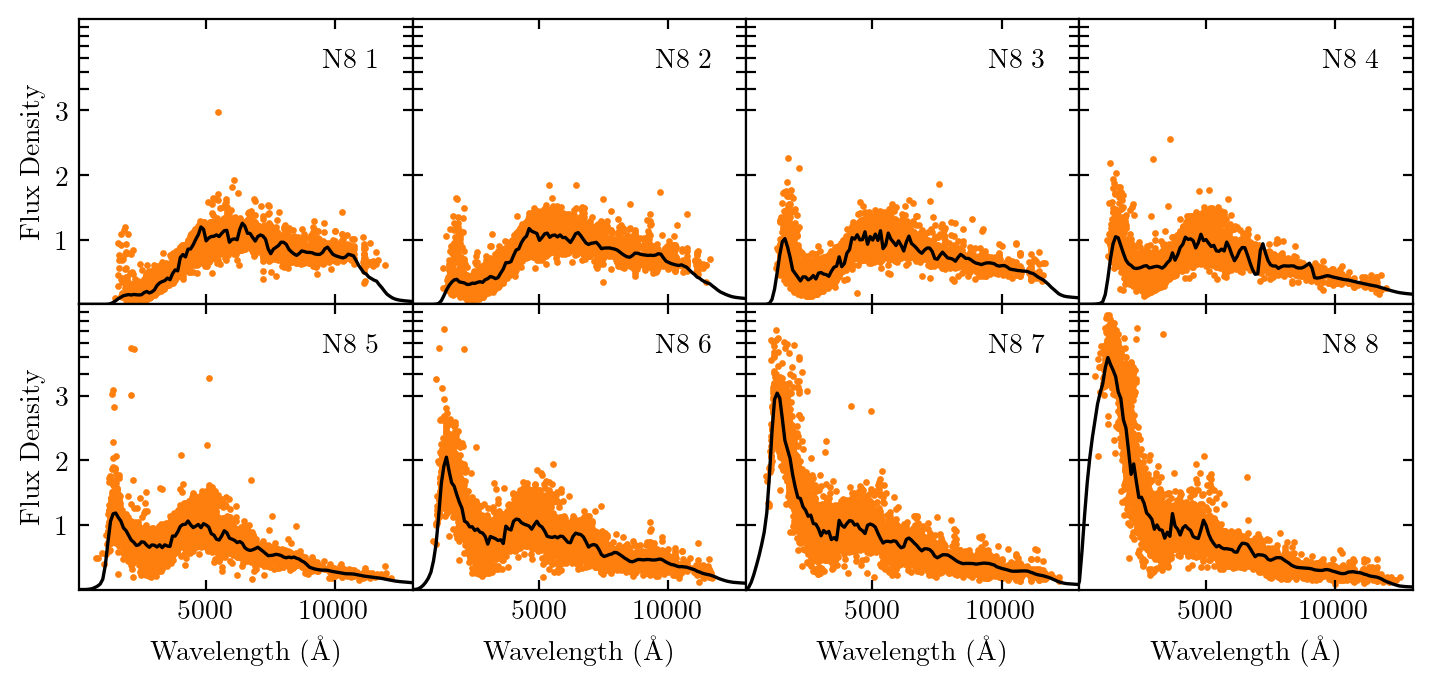

In [8]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

Number of fluxes in each training set:
[41782, 43763, 50131, 60314, 67945, 66615, 55074, 26104]


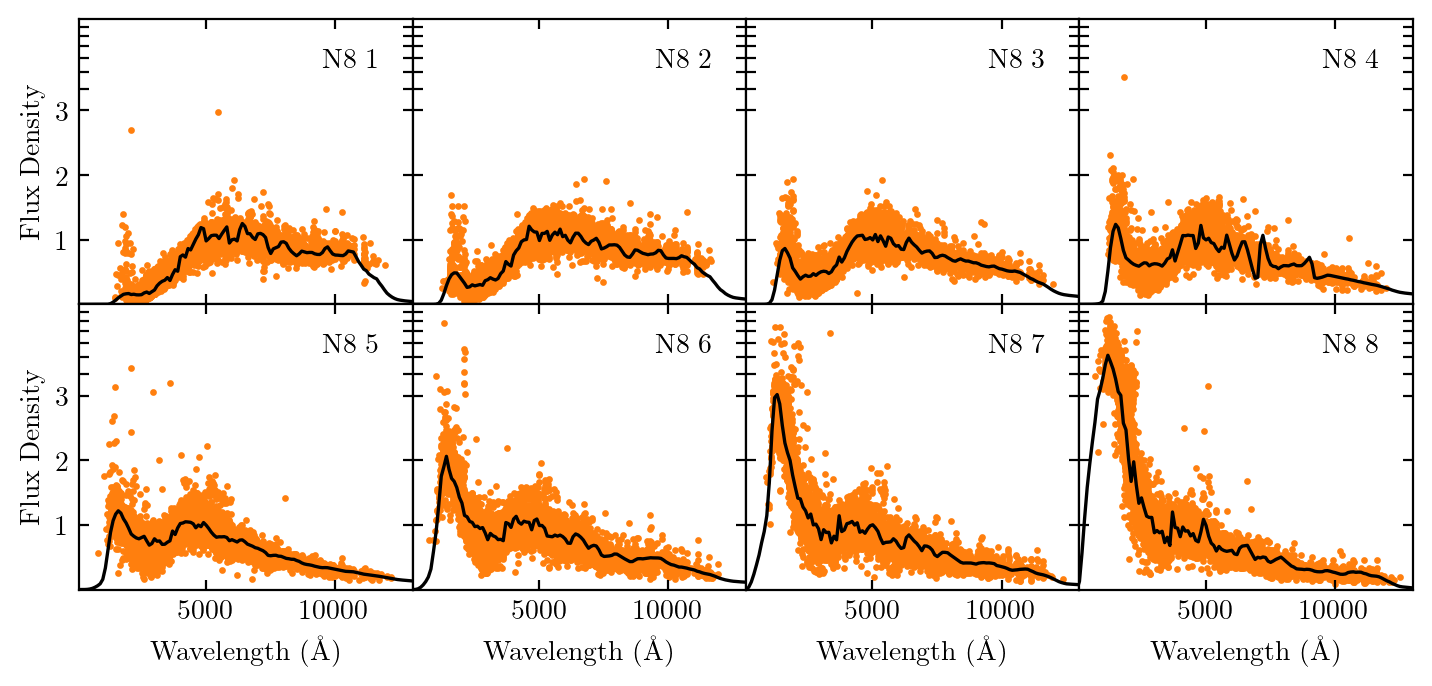

In [7]:
ncols = 4
nrows = int(N/ncols+0.5)
fig, axes = plt.subplots(nrows,ncols,sharex='all',sharey='row',figsize=(twocol,twocol*nrows/ncols*0.95))

print("Number of fluxes in each training set:")
print([len(i) for i in final_sets.values()])

for i,ax in enumerate(axes.flatten()):
    
    wavelen = [row[0] for row in final_sets["N8_"+str(i+1)]]
    fluxes  = [row[1] for row in final_sets["N8_"+str(i+1)]]
    ax.scatter(wavelen, fluxes, s=2, c="C1")
    
    template = trained_templates["N8_"+str(i+1)]
    ax.plot(template.wavelen, template.flambda, c="k")
    
    ax.text(0.9,0.9,"N8 "+str(i+1),transform=ax.transAxes,ha="right",va="top")

for ax in axes[-1,:]:
    ax.set_xlabel('Wavelength ($\mathrm{\AA}$)')
    ax.set_xlim(100,13000)
for ax in axes[:,0]:
    ax.set_ylabel('Flux Density')
    ax.set_yscale('symlog',linthreshy=3)
    ax.set_ylim(0,10)
    ax.set_yticks([1,2,3,4,5,6,7,8,9])
    ax.set_yticklabels([1,2,3,'','','','','',''])
    
fig.tight_layout(pad=0.5, h_pad=0, w_pad=0)
plt.show()

#fig.savefig('plots/N8_trained.png')

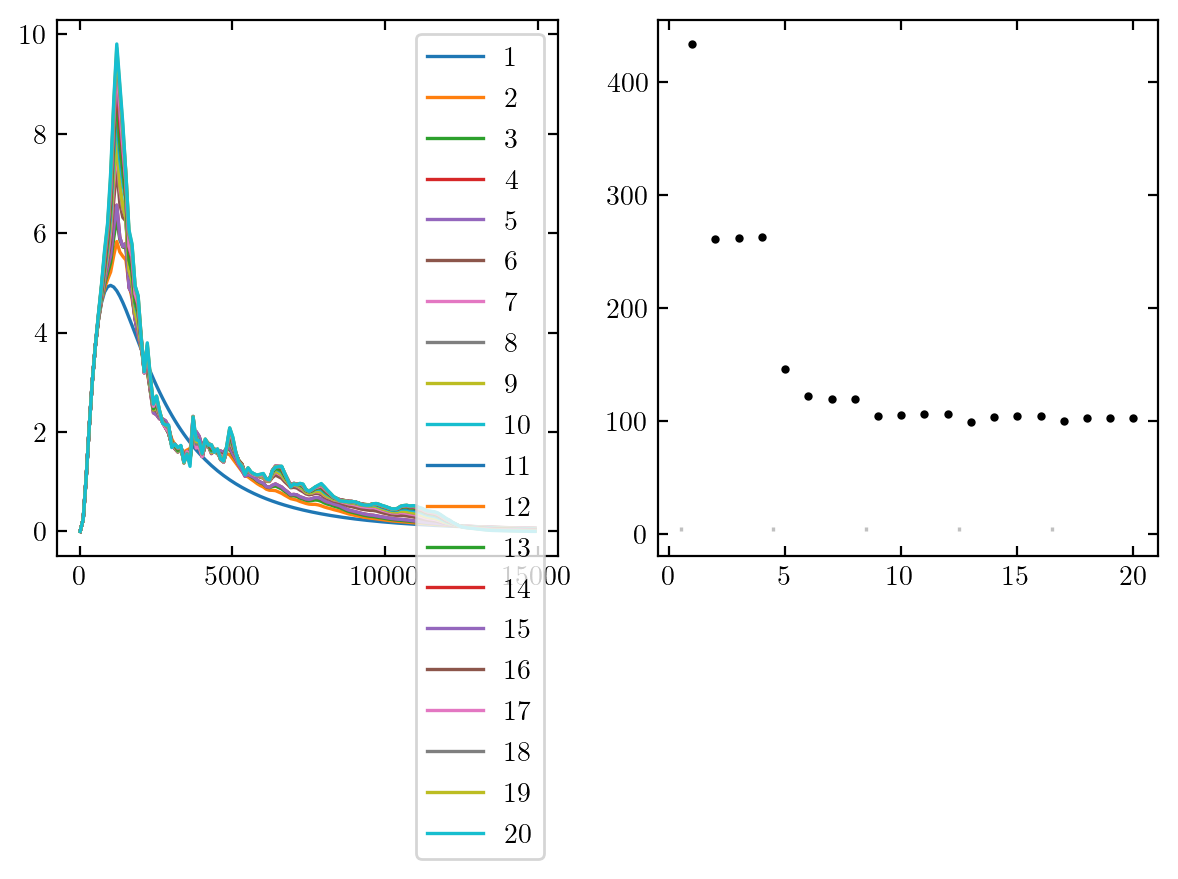

In [44]:
N = 8
seds = []
mses = []
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(twocol,twocol/2))
j = 1
for n in range(1,6):
    ax2.vlines(j-0.5,2,6,color='silver')
    for i in history['N8_'+str(N)][n]:
        sed = history['N8_'+str(N)][n][i][0]
        mse = history['N8_'+str(N)][n][i][2]
        ax1.plot(sed.wavelen,sed.flambda,label=j)
        ax2.scatter(j,mse,c='k')
        j += 1
        seds.append(sed)
        mses.append(mse)
ax1.legend()
        
mses = np.array(mses)
idx = np.where( mses != None)
mses = mses[idx]

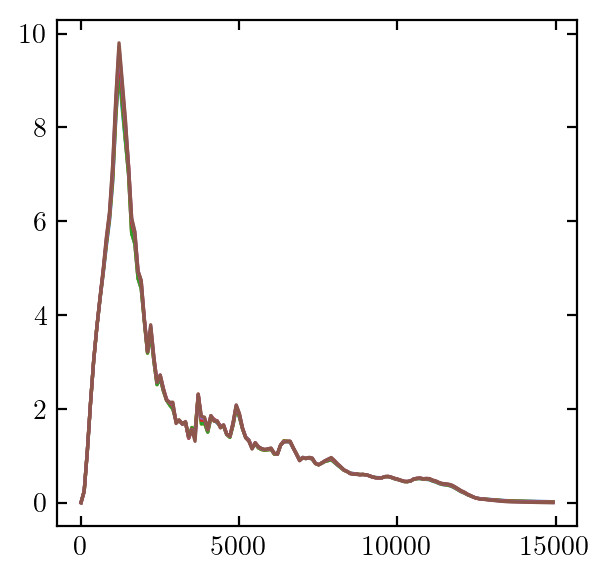

In [45]:
for sed in seds[-6:]:
    plt.plot(sed.wavelen,sed.flambda)

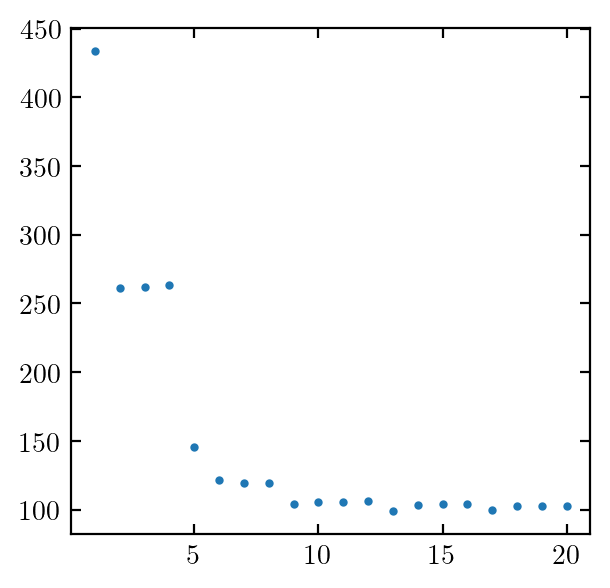

In [46]:
plt.scatter(np.arange(1,len(mses)+1),mses)

[3.98132631e-01 2.59112891e-03 5.63678082e-03 4.47125180e-01
 1.63119587e-01 1.86788000e-02 1.43266831e-03 1.25618381e-01
 7.93787939e-03 4.57222417e-03 2.63929956e-03 6.33465303e-02
 4.12490154e-02 6.73179422e-03 1.78657427e-03 4.01003149e-02
 2.26223815e-02 2.51616609e-03 5.98036423e-05]


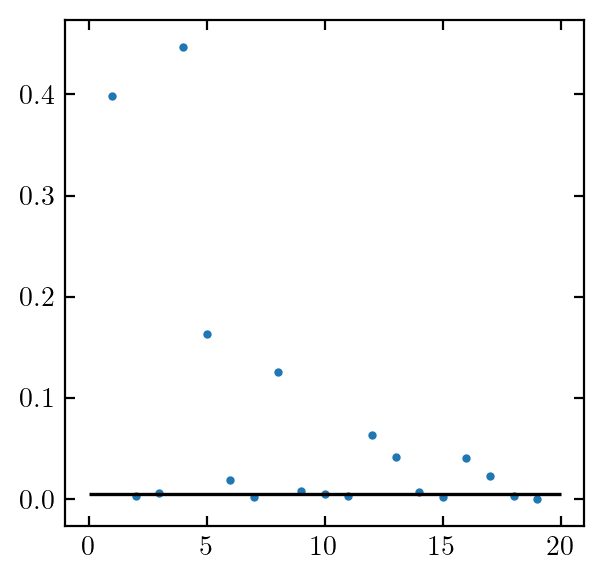

In [47]:
fc = [(mses[i]-mses[i-1])/mses[i-1] for i in range(1,len(mses))]
print(np.abs(fc))
plt.scatter(np.arange(1,len(fc)+1),np.abs(fc))
plt.hlines(0.005,0,20)

# *DONT FORGET TO NOT OVERWRITE THE BELOW! I WANT TO COMPARE THE RESULTANT PLOTS!*

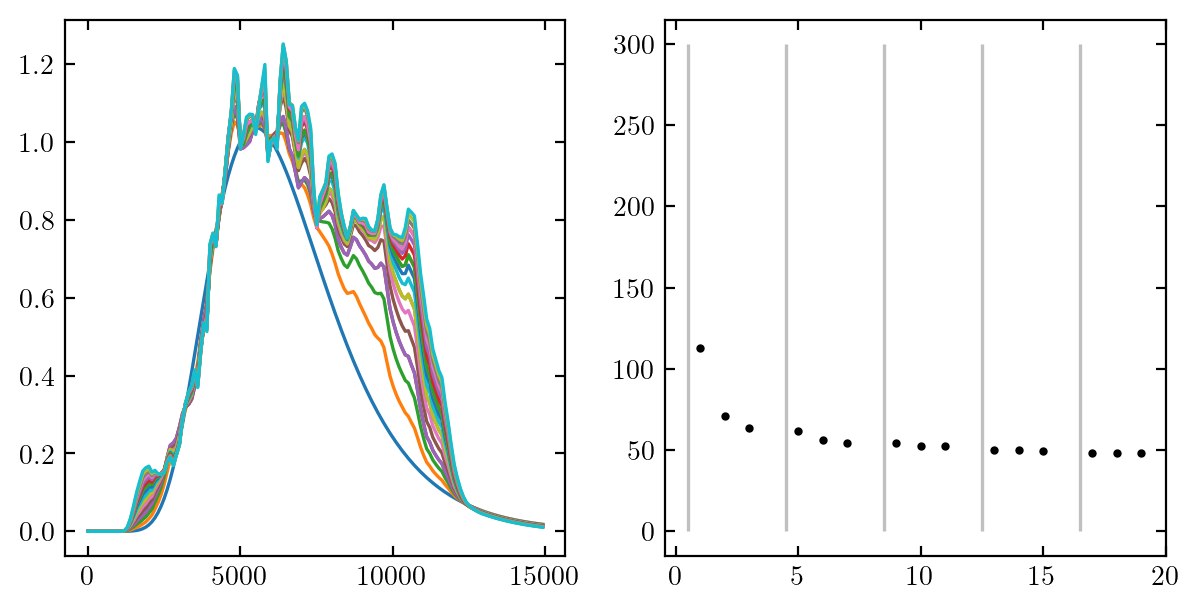

In [63]:
N = 1
seds = []
mses = []
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(twocol,twocol/2))
j = 1
for n in range(1,6):
    ax2.vlines(j-0.5,0,300,color='silver')
    for i in history['N8_'+str(N)][n]:
        sed = history['N8_'+str(N)][n][i][0]
        mse = history['N8_'+str(N)][n][i][2]
        ax1.plot(sed.wavelen,sed.flambda)
        ax2.scatter(j,mse,c='k')
        j += 1
        seds.append(sed)
        mses.append(mse)
        
mses = np.array(mses)
idx = np.where( mses != None)
mses = mses[idx]

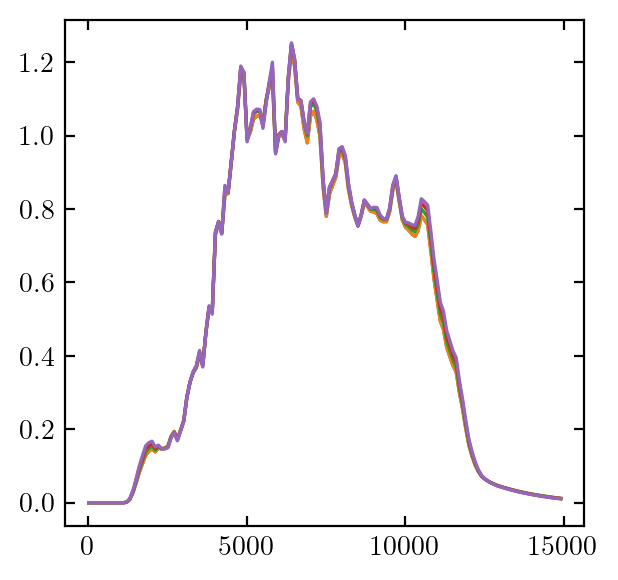

In [64]:
for sed in seds[-5:]:
    plt.plot(sed.wavelen,sed.flambda)

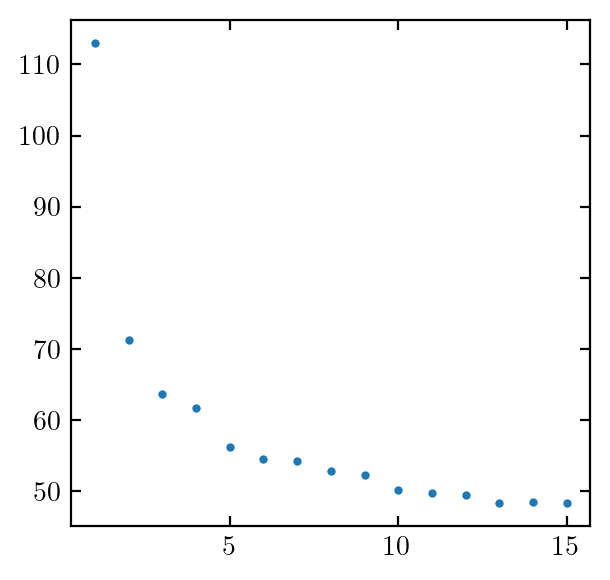

In [65]:
plt.scatter(np.arange(1,len(mses)+1),mses)

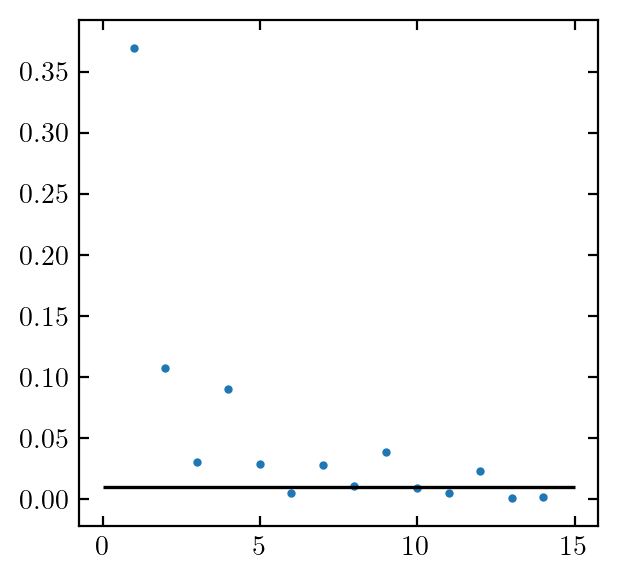

In [66]:
fc = [(mses[i]-mses[i-1])/mses[i-1] for i in range(1,len(mses))]
plt.scatter(np.arange(1,len(fc)+1),np.abs(fc))
plt.hlines(0.01,0,15)